Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Answer:

The fundamental idea of ensemble techniques is to combine multiple models to improve overall performance and accuracy over any single model. Bagging differs from boosting by training multiple models in parallel on random data subsets (to reduce variance), while boosting trains models sequentially, with each new model focusing on correcting the errors of the previous one (to reduce bias).  

Bagging -

Approach: Trains multiple models independently and in parallel on different random subsets of the training data.
Objective: To reduce the variance of the model and decrease overfitting.

Boosting -

Approach: Trains models sequentially, with each new model being built to correct the mistakes of the prior model.
Objective: To reduce the bias of the model by focusing on hard-to-classify examples.

Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

Answer:

The Random Forest Classifier reduces overfitting compared to a single decision tree through the principles of ensemble learning, specifically bagging (Bootstrap Aggregating) and random subspace method.

Bagging: Random Forest constructs multiple decision trees, each trained on a different bootstrap sample (random sampling with replacement) of the original training data. This means each tree sees a slightly different subset of the data, leading to individual trees that overfit differently. When the predictions of these diverse trees are combined (e.g., by majority voting for classification), the errors from individual overfitted trees tend to cancel each other out, resulting in a more generalized and robust model.

Random Subspace Method: In addition to data sampling, Random Forest also introduces randomness in feature selection. At each node split during the construction of an individual tree, only a random subset of features is considered for finding the best split. This further decorrelates the trees, preventing any single feature from dominating the entire forest and reducing the likelihood of all trees making similar errors.

Key Hyperparameters:

n_estimators: This hyperparameter controls the number of decision trees in the forest. Increasing n_estimators generally leads to a more stable and accurate model, as more diverse trees contribute to the final prediction, further reducing variance and overfitting.

max_features: This hyperparameter determines the number of features considered when looking for the best split at each node in an individual tree. A smaller max_features value increases the randomness and decorrelation among trees, making the forest more resistant to overfitting, especially in high-dimensional datasets. Common values include sqrt(n_features) or log2(n_features).

Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Answer:

What is Stacking in Ensemble Learning?

Stacking (Stacked Generalization) is an ensemble technique that combines the predictions of multiple different models (called base learners) using another model, called a meta-learner or blender, to improve overall performance.
Instead of simple averaging or voting, stacking learns the optimal way to combine base model outputs.

How Stacking Works:

Level-0 (Base Learners):
Multiple models (e.g., Decision Tree, Logistic Regression, SVM) are trained independently on the same dataset.

Level-1 (Meta-Learner):
The predictions (outputs) from these base models become the input features for another model — the meta-learner, which learns how to best combine them to make the final prediction.

Example Use Case:

Suppose you are building a loan approval prediction system.

Base learners (Level-0):

Logistic Regression (captures linear patterns)

Decision Tree (captures non-linear relationships)

Random Forest (handles complex interactions)

Meta-learner (Level-1):

Gradient Boosting model that takes the predictions of the above models and learns the best way to combine them.

This stacked model would generally perform better than any single model alone, as it leverages the strengths of all.

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

Answer:

The OOB (Out-Of-Bag) score is a performance metric for a Random Forest model, representing the accuracy calculated on the data that was not used to train each individual tree. It is useful because it acts as an unbiased validation score, allowing model evaluation without needing a separate validation set, which is particularly useful in situations where data is limited.  

How it works

Random Forest uses bootstrap aggregation, where each tree is trained on a random sample with replacement from the original dataset.

Approximately two-thirds of the data is used to train each tree, leaving about one-third as "out-of-bag" (OOB) samples.

For each data point, its prediction is made using the trees that were not trained on it.

The OOB score is the average accuracy of these predictions across all data points.

Why it's useful

Model evaluation without a separate validation set: Since each tree makes predictions on its out-of-bag samples, these samples serve as a natural validation set. This means you can get a reliable estimate of the model's generalization performance without holding out a portion of your data.

Unbiased estimate: The OOB score is an unbiased estimate of the model's performance, similar to what a cross-validation score would provide.

Useful for model selection and tuning: A high OOB score indicates a good model, while a lower score suggests the model may not be generalizing well. This can help in selecting hyperparameters or deciding when to stop adding trees.

Efficiency: It allows you to use all your data for training the forest, which can be beneficial for smaller datasets where splitting the data would reduce the available training information.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:

● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases

Answer:

AdaBoost and Gradient Boosting are both ensemble learning techniques that combine multiple weak learners to create a strong learner, but they differ in their approach to handling errors, adjusting weights, and typical use cases.

1. How they handle errors from weak learners:

AdaBoost: AdaBoost focuses on misclassified data points. In each iteration, it increases the weights of the misclassified samples, forcing the subsequent weak learner to pay more attention to these difficult-to-classify instances. The error is directly related to the misclassification rate.

Gradient Boosting: Gradient Boosting handles errors by fitting subsequent weak learners to the residuals (the difference between the actual and predicted values) of the previous learners. It aims to minimize a defined loss function (e.g., mean squared error for regression, log loss for classification) by taking steps in the direction of the negative gradient of the loss function. The error is represented by the residuals.

2. Weight adjustment mechanism:

AdaBoost: AdaBoost adjusts the weights of the training samples. Misclassified samples receive higher weights, while correctly classified samples receive lower weights. Additionally, each weak learner is assigned a weight based on its accuracy, and these weighted predictions are combined to form the final prediction.

Gradient Boosting: Gradient Boosting does not directly adjust sample weights in the same way as AdaBoost. Instead, it builds new weak learners that fit the residuals of the previous model. The contribution of each new weak learner to the ensemble is determined by minimizing the overall loss function using a gradient descent-like approach.

3. Typical use cases:

AdaBoost: AdaBoost is primarily used for binary classification tasks and is known for its simplicity and effectiveness, especially with weak learners like decision stumps (single-split decision trees). It can be sensitive to noisy data and outliers due to its aggressive weighting mechanism.

Gradient Boosting: Gradient Boosting is more versatile and can be applied to both regression and classification problems. It is known for its high predictive accuracy and ability to handle complex relationships in data, making it suitable for a wider range of applications, including fraud detection, recommendation systems, and predictive analytics in various domains. It is generally less sensitive to noise than AdaBoost as it smooths updates using gradients.

Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

Answer:

CatBoost performs well on categorical features because it uses an advanced encoding technique called "ordered target statistics" (or "ordered boosting") instead of traditional one-hot or label encoding.

Here’s how it handles categorical variables:

CatBoost converts categorical values into numerical representations based on the average target value (target mean encoding), but it does this in an order-aware way to prevent target leakage.

For each data point, the encoding is computed using only the previous examples (according to a random permutation of the dataset), ensuring that the model doesn’t use future information.

It also uses multiple random permutations and combines results to make the encoding more robust and less prone to overfitting.

This built-in mechanism allows CatBoost to handle categorical features natively and efficiently, without requiring manual preprocessing like one-hot encoding or label encoding.

In [ ]:
# Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization
# Task:
# 1. Load the Wine dataset (sklearn.datasets.load_wine()).
# 2. Split data into 70% train and 30% test.
# 3. Train a KNN classifier (default K=5) without scaling and evaluate using:
# a. Accuracy
# b. Precision, Recall, F1-Score (print classification report)
# 4. Apply StandardScaler, retrain KNN, and compare metrics.
# 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).
# 6. Train the optimized KNN and compare results with the unscaled/scaled versions.

#Answer:

# Step 1: Import Libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the Wine dataset
data = load_wine()
X, y = data.data, data.target

# Step 3: Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Train KNN without scaling (default K=5)
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

# Evaluate performance
print("=== KNN Without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_unscaled))

# Step 5: Apply StandardScaler and retrain
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== KNN With StandardScaler ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))

# Step 6: Use GridSearchCV to find best K and metric
param_grid = {
    'n_neighbors': list(range(1, 21)),  # K = 1 to 20
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("\n=== Grid Search Results ===")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 7: Train optimized KNN and compare results
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN (After GridSearchCV) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

=== KNN Without Scaling ===
Accuracy: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== KNN With StandardScaler ===
Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== Grid Search Results ===
Best Parameters: {'metric': 'euclidean',

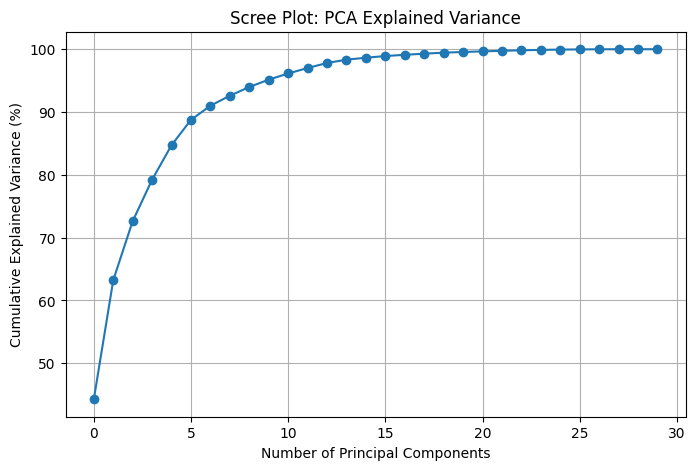

Original Features: 30
Reduced Features (95% variance): 10

=== KNN Accuracy Comparison ===
Original Data Accuracy: 0.9708
PCA (95% variance) Accuracy: 0.9474


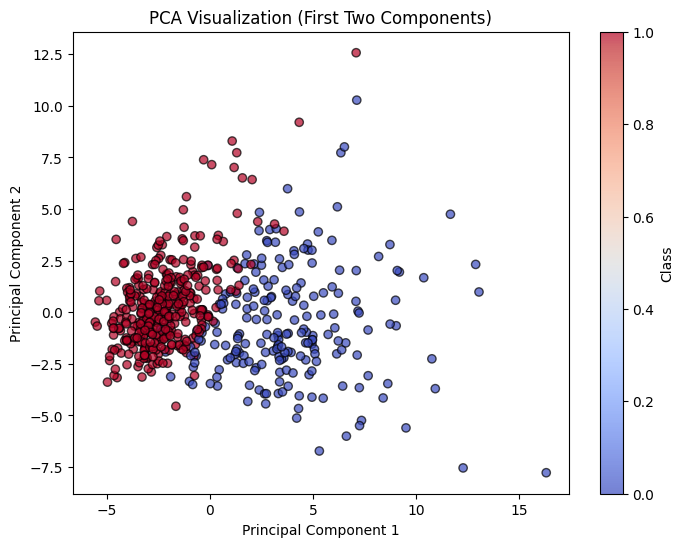

In [ ]:
# Question 8 : PCA + KNN with Variance Analysis and Visualization
# Task:
# 1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
# 2. Apply PCA and plot the scree plot (explained variance ratio).
# 3. Retain 95% variance and transform the dataset.
# 4. Train KNN on the original data and PCA-transformed data, then compare accuracy.
# 5. Visualize the first two principal components using a scatter plot (color by class).

# Answer:

# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 3: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Plot Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot: PCA Explained Variance')
plt.grid(True)
plt.show()

# Step 6: Retain 95% Variance and Transform Dataset
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"Original Features: {X.shape[1]}")
print(f"Reduced Features (95% variance): {X_pca_95.shape[1]}")

# Step 7: Split Data into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_95, y, test_size=0.3, random_state=42, stratify=y)

# Step 8: Train KNN on Original Data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# Step 9: Train KNN on PCA-Transformed Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Step 10: Compare Results
print("\n=== KNN Accuracy Comparison ===")
print(f"Original Data Accuracy: {acc_original:.4f}")
print(f"PCA (95% variance) Accuracy: {acc_pca:.4f}")

# Step 11: Visualize First Two Principal Components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (First Two Components)')
plt.colorbar(label='Class')
plt.show()



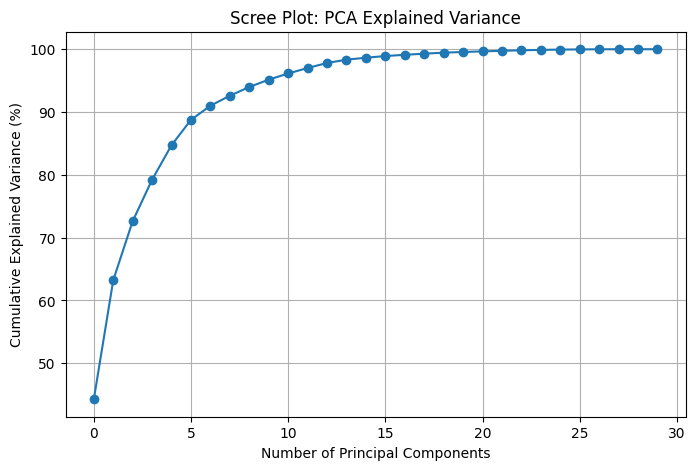

Original Features: 30
Reduced Features (95% variance): 10

=== KNN Accuracy Comparison ===
Original Data Accuracy: 0.9708
PCA (95% variance) Accuracy: 0.9474


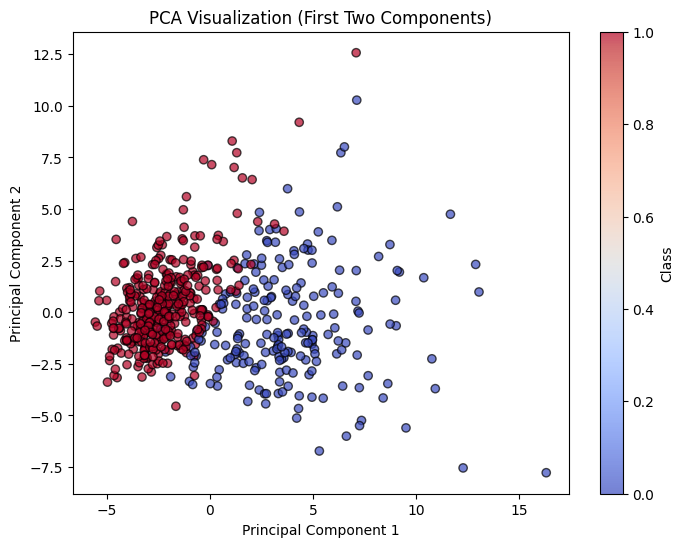

In [ ]:
# Question 9:KNN Regressor with Distance Metrics and K-Value Analysis
# Task:
# 1. Generate a synthetic regression dataset
# (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
# 2. Train a KNN regressor with:
# a. Euclidean distance (K=5)
# b. Manhattan distance (K=5)
# c. Compare Mean Squared Error (MSE) for both.
# 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

# Answer:

# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 3: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Plot Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot: PCA Explained Variance')
plt.grid(True)
plt.show()

# Step 6: Retain 95% Variance and Transform Dataset
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"Original Features: {X.shape[1]}")
print(f"Reduced Features (95% variance): {X_pca_95.shape[1]}")

# Step 7: Split Data into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_95, y, test_size=0.3, random_state=42, stratify=y)

# Step 8: Train KNN on Original Data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# Step 9: Train KNN on PCA-Transformed Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Step 10: Compare Results
print("\n=== KNN Accuracy Comparison ===")
print(f"Original Data Accuracy: {acc_original:.4f}")
print(f"PCA (95% variance) Accuracy: {acc_pca:.4f}")

# Step 11: Visualize First Two Principal Components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (First Two Components)')
plt.colorbar(label='Class')
plt.show()


Dataset Shape: (768, 9)
   preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive

Missing values before imputation:
preg       0
plas       5
pres      35
skin     227
insu     374
mass      11
pedi       0
age        0
class      0
dtype: int64

Missing values after imputation:
preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

=== BRUTE ===
Training Time: 0.0011 seconds
Accuracy: 0.7359

=== KD_TREE ===
Training Time: 0.0018 seconds
Accuracy: 0.7359

=== BALL_TREE ===
Training Time: 0.0018 seconds
Accuracy: 0.7359

=== Performance Comparison ===
           accuracy      time
brute    

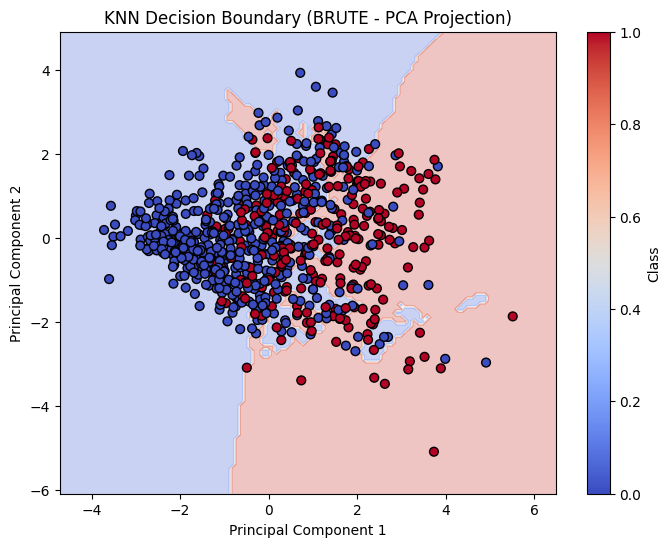

In [ ]:
# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
# Task:
# 1. Load the Pima Indians Diabetes dataset (contains missing values).
# 2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
# 3. Train KNN using:
# a. Brute-force method
# b. KD-Tree
# c. Ball Tree
# 4. Compare their training time and accuracy.
# 5. Plot the decision boundary for the best-performing method (use 2 most important features).
# Dataset: Pima Indians Diabetes

# Answer:

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Step 2: Load the Pima Indians Diabetes Dataset
# (Available from OpenML or UCI repository)
from sklearn.datasets import fetch_openml
pima = fetch_openml(name='diabetes', version=1, as_frame=True)
df = pima.frame

print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Identify and handle missing values (replace 0 with NaN where appropriate)
# In this dataset, some 0s actually represent missing values in certain columns
cols_with_missing = ['plas', 'pres', 'skin', 'insu', 'mass']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

print("\nMissing values before imputation:")
print(df.isna().sum())

# Step 4: KNN Imputation to fill missing values
imputer = KNNImputer(n_neighbors=5)
# Select only numerical columns for imputation, exclude the target 'class' column
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
df_imputed_numerical = pd.DataFrame(imputer.fit_transform(df[numerical_cols]), columns=numerical_cols)

# Combine imputed numerical features with the original 'class' column
df_imputed = df_imputed_numerical.copy()
df_imputed['class'] = df['class']


print("\nMissing values after imputation:")
print(df_imputed.isna().sum())

# Step 5: Split data into features and target
X = df_imputed.drop(columns='class')
y = df_imputed['class'].astype('category').cat.codes  # Convert to numeric

# Step 6: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Step 8: Train KNN with different algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start_time = time.time()
    knn.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[algo] = {'accuracy': acc, 'time': train_time}
    print(f"\n=== {algo.upper()} ===")
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Accuracy: {acc:.4f}")

# Step 9: Compare performance
results_df = pd.DataFrame(results).T
print("\n=== Performance Comparison ===")
print(results_df)

# Step 10: Choose best algorithm (highest accuracy)
best_algo = results_df['accuracy'].idxmax()
print(f"\nBest Performing Method: {best_algo.upper()}")

# Step 11: Train best model for visualization
best_knn = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
best_knn.fit(X_train, y_train)

# Step 12: PCA to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 13: Decision Boundary Visualization
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Train again on 2D PCA data for visualization
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)
best_knn.fit(X_train_pca, y_train_pca)
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title(f"KNN Decision Boundary ({best_algo.upper()} - PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class")
plt.show()